<br></br>
# **Word Cloud - 말뭉치 응용**

## **1 Stemming Tagging의 활용 (한글문서 전처리 작업)**
1. 특정 형태소의 Token만 추출하기
1. **Stemming** 작업은 **동사, 형용사** 에만 적용
1. 한글의 특성상 이를 활용하면 **명사의 정규화** 작업이 가능하다

In [1]:
# Twitter() 를 활용하여 Stemming, Tagging 추가하기
from konlpy.tag import Twitter
twitter = Twitter()
tokens  = twitter.pos('김정은과 문재인의 평양만남', stem=True)
tokens

[('김정은', 'Noun'),
 ('과', 'Josa'),
 ('문재인', 'Noun'),
 ('의', 'Josa'),
 ('평양', 'Noun'),
 ('만남', 'Noun')]

In [2]:
# 명사 Token을 추출하기 1
result = []
for token in tokens:
    if token[1] == "Noun":
        result.append(token[0])
result

['김정은', '문재인', '평양', '만남']

In [3]:
# 명사 Token을 추출하기 2
# List 객체 함수를 활용
result_list = [token[0] for token in tokens
                        if token[1] == "Noun"]
result_list

['김정은', '문재인', '평양', '만남']

In [4]:
" ".join(result)

'김정은 문재인 평양 만남'

## **2 Word Cloud 간단적용**

In [5]:
# ! pip install wordcloud

In [6]:
# DDP 평양 남북정상회담 국민보고문 불러오기
with open('../data/pyongyang_fin.txt', 'r', encoding='utf-8') as f:
    texts = f.read()
texts[:100]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은'

In [7]:
# ! pip install matplotlib

(-0.5, 399.5, 199.5, -0.5)

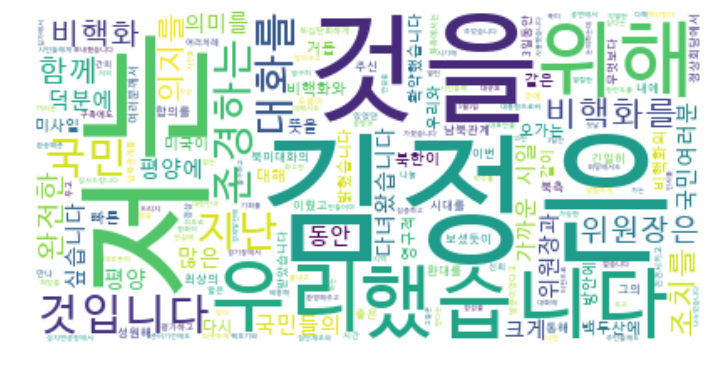

In [8]:
%matplotlib inline

# Text Document를 별도의 전처리 없이 Word Cloud 모듈에 바로적용
from wordcloud import WordCloud
wcloud = WordCloud('../data/D2Coding.ttf', 
                   relative_scaling = 0.1, 
                   background_color='white').generate(texts)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [9]:
# Token 빈도결과값
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
tokens  = word_tokenize(texts)
freqtxt = pd.Series(dict(FreqDist(tokens))).sort_values(ascending=False)
freqtxt[:10]

.       46
김정은      7
,        6
것을       6
저는       6
수        5
위해       5
것입니다     4
우리       4
했습니다     4
dtype: int64

<br></br>
## **3 명사만 추출하여 Wordcloud 만들기**
1. _**평양**_ 에서 _**백두산**_ 의 등반과정에서 _**날씨**_ 가 좋다 
1. **Stemming**은 **동사/ 형용사**의 어근/ 어간을 추출한다
1. 한글의 **명사**는 **조사, 접사가 붙어 있고** 분리를 위해 **Tag**를 활용

In [10]:
# 원본 Text 내용 살펴보기
texts[:300]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은 위원장과 여러차례 만나 긴 시간 많은 대화를 허심탄회하게 나눌 수 있었던 것에 큰 의미를 두고 싶습니다.\n\n남북관계를 크게 진전시키고 두 정상 간의 신뢰 구축에도 큰 도움이 된 방문이었다고 평가하고 싶습니다.\n\n북측에서는 짧은 준비기간에도 불구하고 우리 대표단을 정성을 다해 맞아 주었습니다.\n\n오고 가는 동안 공항과 길가에서 열렬하게 환영해주고 환송해준 '

In [11]:
# Twitter 모듈을 활용하여 명사만 추출
tokens      = twitter.pos(texts, stem=True)
tokens_noun = [token[0]   for token in tokens  
                          if token[1] == "Noun"]
texts_noun  = " ".join(tokens_noun)
texts_noun[:300]

'존경 국민 여러분 성원 주신 덕분 평양 국민 여러분 정상회담 합의 최상 환대 무엇 일동 안 김정은 위원장 여러 차례 시간 대화 허심 탄회 수 것 의미 남북관계 크게 진전 두 정상 간의 신뢰 구축 도움 방문 평가 북 준비 기간 불구 우리 대표 단 정성 다해 동안 공항 길가 열렬 환영 환송 평양 시민 각별 인사 수 백두산 동안 삼지연공항 배웅 준 지역 주민 감사 저 월 일 경기장 대규모 집단체조 공연 만 평양 시민 대한민국 대통령 사상 최초 연설 기회 그 한반도 영구 핵무기 핵 위협 평화 터전 저 연설 대해 열렬 박수 보 존경 국민 여'

(-0.5, 399.5, 199.5, -0.5)

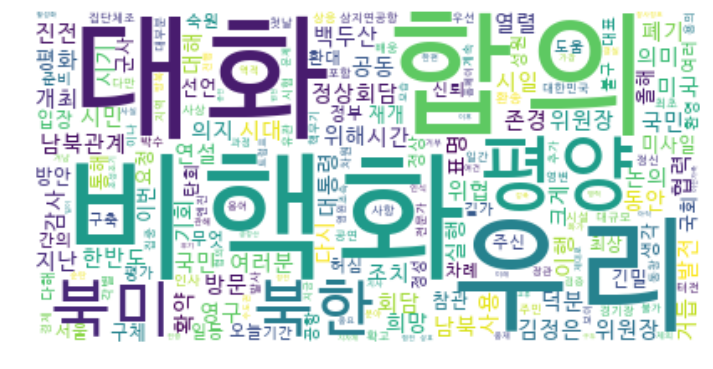

In [12]:
%matplotlib inline
wcloud = WordCloud('../data/D2Coding.ttf',
                   relative_scaling = 0.1,
                   background_color = "white").generate(texts_noun)

plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
# Token 빈도결과값
tokens  = word_tokenize(texts_noun)
freqtxt = pd.Series(dict(FreqDist(tokens))).sort_values(ascending=False)
freqtxt[:20]

것      14
국민     10
비핵화    10
위원장     9
우리      8
저       8
합의      8
대화      8
북미      7
그       7
평양      7
김정은     7
북한      7
회담      5
위해      5
남북      5
수       5
의지      4
폐기      4
뜻       4
dtype: int64